In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(url,header=None)

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers

In [4]:
df.replace("?",np.nan,inplace=True)

In [5]:
df.isnull().head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [7]:
for columns in list(df.columns):
    print(columns)
    print (df[columns].isnull().value_counts())
    print("") 

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [8]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [9]:
df["bore"].replace(np.nan, df['bore'].astype("float").mean(), inplace=True)

In [10]:
df['horsepower'].replace(np.nan, df['horsepower'].astype("float").mean(), inplace=True)

In [11]:
df['peak-rpm'].replace(np.nan, df['peak-rpm'].astype("float").mean(), inplace=True)

In [12]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [13]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [14]:
df['num-of-doors'].replace(np.nan,df['num-of-doors'].value_counts().idxmax(),inplace=True)

In [15]:
df['price'].isnull().value_counts()
df.shape

(205, 26)

In [16]:
df.dropna(subset=['price'],axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(201, 26)

In [17]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [18]:
df['horsepower'] = df['horsepower'].astype('int')

In [19]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [20]:
df['city-L/100km'] = 235/df["city-mpg"]
df.shape

(201, 27)

In [21]:
df["highway-L/100km"] = 100/df["highway-mpg"]

In [22]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [23]:
df['height'] = df['height']/df['height'].max()

In [24]:
df[['height','width','length']].head()

,height,width,length
0,0.816054,0.890278,0.811148
1,0.816054,0.890278,0.811148
2,0.876254,0.909722,0.822681
3,0.908027,0.919444,0.848630
4,0.908027,0.922222,0.848630


In [25]:
df['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

In [26]:
df = pd.concat([df,pd.get_dummies(df["fuel-type"])],axis=1)

In [27]:
df["aspiration"].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [28]:
df = pd.concat([df,pd.get_dummies(df["aspiration"])],axis=1)

In [29]:
bins = np.linspace(min(df["price"]),max(df["price"]),4)
bins_index = ['low','medium','high']

In [30]:
df['price-binned'] = pd.cut(df['price'],bins,labels=bins_index,include_lowest=True)

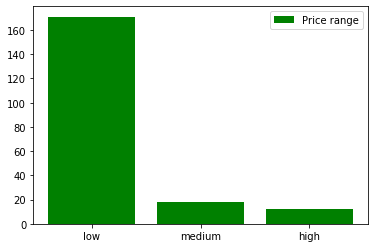

In [31]:
plt.bar(bins_index,df['price-binned'].value_counts(),label="Price range",color='green')
plt.legend()
plt.show()

descrptive statstics

In [32]:
#pridictive variables on the y axis and rest depended components on the x axis

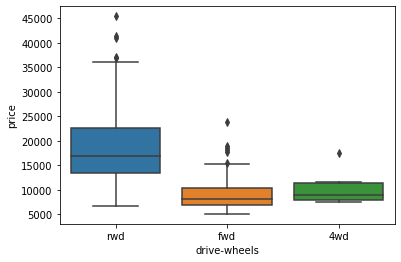

In [33]:
sns.boxplot(x="drive-wheels",y="price",data=df)

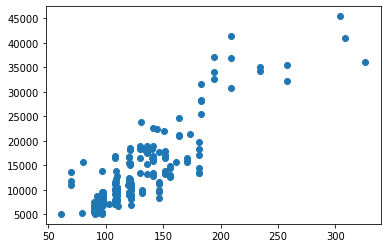

In [34]:
plt.scatter(df["engine-size"],df["price"])

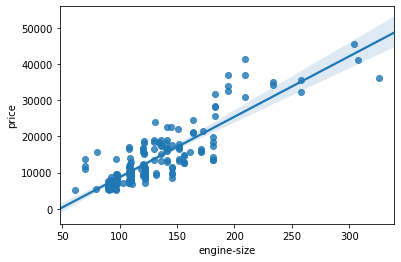

In [35]:
sns.regplot(x="engine-size",y="price",data=df)

GROUP BY

In [36]:
df['body-style'].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [37]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [38]:
df_test = df[['drive-wheels','body-style','price']]

In [39]:
df_grp = df_test.groupby(['drive-wheels','body-style'],as_index = False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [40]:
df_pivot = df_grp.pivot(index='drive-wheels',columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

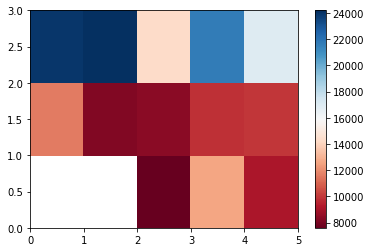

In [41]:
#heatmap

plt.pcolor(df_pivot,cmap="RdBu")
plt.colorbar()
plt.show()

correlations

In [42]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,std,turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,...,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.047885,0.241303,-0.241303,-0.218674,0.218674


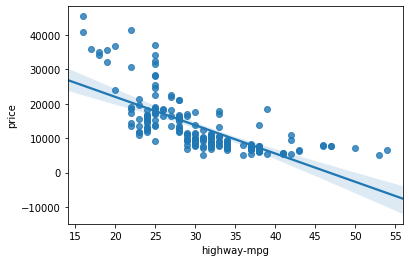

In [43]:
sns.regplot(x='highway-mpg',y='price',data=df)

<b>Pearson Correlation</b>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

<strong> <font color="red"> strong correlation if pearson correlation value is large and P-value is small

In [44]:
p_c, p_v = stats.pearsonr(df['horsepower'], df['price'])
print(p_c," ",p_v)

0.8096068016571053   6.273536270650683e-48


<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p>F- score: it is the difference bw the mean of the two groups</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

<strong> <font color="red"> strong correlation if F-value is large and P-value is small

In [45]:
df_anova = df[['make','price']]
anova_grp = df_anova.groupby(['make'])

In [46]:
f_val, p_val = stats.f_oneway(anova_grp.get_group('honda')['price'], anova_grp.get_group('jaguar')['price'])  
 
print( "ANOVA results: F =", f_val, ", P =", p_val)   

ANOVA results: F = 400.925870564337 , P = 1.0586193512077862e-11


In [47]:
f_val, p_val = stats.f_oneway(anova_grp.get_group('honda')['price'], anova_grp.get_group('subaru')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.19744030127462606 , P = 0.6609478240622193


# Model Development

### Linear regression

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
X = df[['highway-mpg']]
Y = df['price']

In [50]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
Yhat = lm.predict(X)
Yhat[:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [52]:
lm.intercept_

38423.305858157386

In [53]:
lm.coef_

array([-821.73337832])

<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>

### Multiple Regression

In [54]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
lm.intercept_

-15811.863767729228

In [118]:
lm.coef_

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>

## Regplot have a regression line 

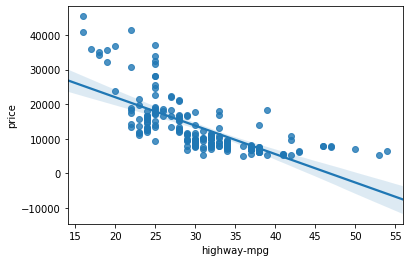

In [57]:
sns.regplot(x="highway-mpg",y="price",data=df)

<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

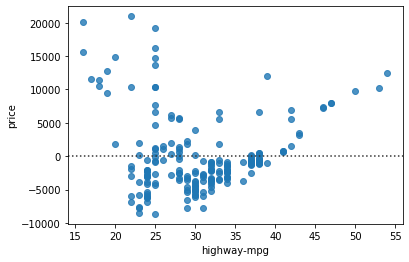

In [58]:
sns.residplot(df['highway-mpg'],df['price'])

as the residplot is now linear and accurate we can not predict this with linear regression we need to go for poly reg.
futher you will learn about that

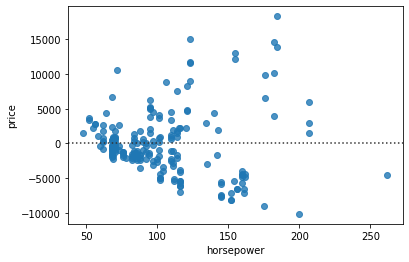

In [59]:
sns.residplot(df['horsepower'],df['price'])

## Multiple linear regression

In [101]:
Yhat[:5] #highway-mpg
#Yhat = lm.predict(X)

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [63]:
Z.head()

,horsepower,curb-weight,engine-size,highway-mpg
0,111,2548,130,27
1,111,2548,130,27
2,154,2823,152,26
3,102,2337,109,30
4,115,2824,136,22


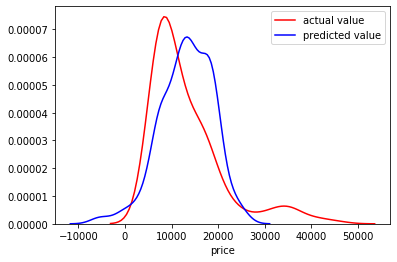

In [121]:
sns.distplot(df['price'],hist=False,color='red',label="actual value")
sns.distplot(Yhat,hist=False,color="blue",label="predicted value")

## Polynomial Regression and Pipelines

In [146]:
x = df['highway-mpg'] # starts from 16 and ends on 54
y = df['price']
f = np.polyfit(x, y, 3)
formula = np.poly1d(f)
print(formula)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [114]:
x_new = np.linspace(15,55,100)
y_new = formula(x_new)

Text(0, 0.5, 'Price')

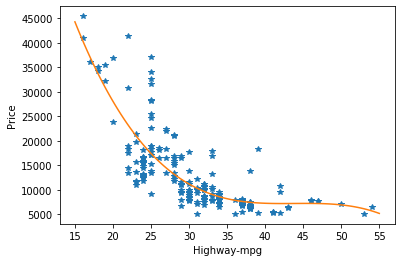

In [115]:
plt.plot(x,y,"*") #as star
plt.plot(x_new,y_new,"-") #as line
plt.xlabel("Highway-mpg")
plt.ylabel("Price")

<h2>Measures for In-Sample Evaluation</h2>
<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>

In [135]:
from sklearn.metrics import mean_squared_error

<h3>Model 1: Simple Linear Regression</h3>

In [137]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)
Yhat = lm.predict(X)

In [136]:
print("r-squared : ",lm.score(X,Y))

r-squared :  0.4965911884339175


In [139]:
print("Mean squared error : " , mean_squared_error(df['price'], Yhat))

Mean squared error :  31635042.944639895


<h3>Model 2: Multiple Linear Regression</h3>

In [142]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z,Y)
Zhat = lm.predict(Z)

In [143]:
print("r-squared : ",lm.score(Z,Y))

r-squared :  0.8093732522175299


In [144]:
print("Mean squared error : " , mean_squared_error(df['price'], Zhat))

Mean squared error :  11979300.34981888


<h3>Model 3: Polynomial Fit</h3>

In [150]:
from sklearn.metrics import r2_score

In [147]:
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 3)
formula = np.poly1d(f)
print(formula)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [151]:
print('The R-square value is: ', r2_score(y, formula(x)))

The R-square value is:  0.6741946663906515


We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit